Populating the interactive namespace from numpy and matplotlib


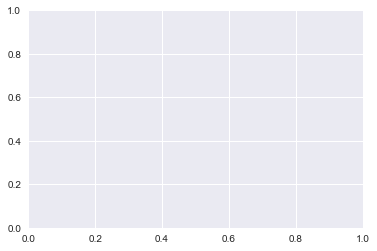

In [3]:
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from IPython.core.magic import register_cell_magic
import pandas as pd
import numpy as np
plt.ticklabel_format(style='plain', axis='y')

In [4]:
bechdelDataset = pd.read_csv('mergeWithRevenue.csv', encoding='latin-1') 
bechdelDataset.head(10)

,Unnamed: 0,id,imdb_id,Rating,Title,Year,Unnamed: 0_y,color,director_name,num_critic_for_reviews,...,parental_rating,production_company,adjusted_box_office,Multigenre,director_name%,writer%,producer%,director_gender,producer_gender,writer_gender
0,0,5433,3.0,0,Pauvre Pierrot,1892,NaN,NaN,«_mile Reynaud,0,...,NaN,NaN,0.0,Y,0.000000,0.0,0.000000,M,M,M
1,1,5444,14.0,0,Tables Turned on the Gardener,1895,NaN,NaN,Louis Lumi«_re,0,...,NaN,NaN,0.0,Y,0.000000,0.0,0.000000,M,M,M
2,2,6200,132134.0,0,"Execution of Mary, Queen of Scots, The",1895,NaN,NaN,Alfred Clark,0,...,NaN,NaN,0.0,Y,0.000000,0.0,0.000000,M,M,M
3,3,6199,12.0,0,"Arrival of a Train, The",1896,NaN,NaN,Auguste Lumi«_re,0,...,NaN,NaN,0.0,Y,0.000000,0.0,0.000000,M,M,M
4,4,5406,131.0,0,Une nuit terrible,1896,NaN,NaN,Georges M««©li«_s,0,...,NaN,NaN,0.0,Y,0.032258,0.0,0.058824,M,M,M
5,5,4982,91.0,0,"House of the Devil, The",1896,NaN,NaN,Georges M««©li«_s,0,...,NaN,NaN,0.0,Y,0.032258,0.0,0.058824,M,M,M
6,6,5445,223341.0,0,La fee aux choux,1896,NaN,NaN,Alice Guy,0,...,NaN,NaN,0.0,Y,0.000000,0.0,0.000000,F,M,F
7,7,5411,224240.0,0,"Temptation of St. Anthony, The",1898,NaN,NaN,Georges M««©li«_s,0,...,NaN,NaN,0.0,Y,0.032258,0.0,0.000000,M,M,M
8,8,5410,211.0,0,"Astronomer&#39;s Dream; or, The Man in the Moo...",1898,NaN,NaN,Georges M««©li«_s,0,...,NaN,Kadokawa Pictures,0.0,Y,0.032258,0.0,0.058824,M,M,M
9,9,4978,135696.0,0,Four Heads Are Better Than One,1898,NaN,NaN,Georges M««©li«_s,0,...,NaN,NaN,0.0,Y,0.032258,0.0,0.058824,M,M,M


In [5]:
#use this to construct pass percentages for each director/writer/producer 
#over their work in the dataset
from collections import defaultdict

def returnValue(x, counter):
    if (pd.notnull(x)):
       return counter[x]
    else:
       return 0.0

def constructRecord(dataset, role):
    columnName = role
    passValues = dataset[dataset.binary == 'PASS'][columnName].value_counts().to_dict()
    totalValues = dataset[columnName].value_counts().to_dict()
    passDict = defaultdict(float)
    for value in passValues:
        passDict[value] = passValues[value] / totalValues[value]
           
    dataset[columnName+'%'] = dataset[columnName].apply(lambda x: returnValue(x, passDict))  
    return dataset


In [ ]:
bechdelDataset = constructRecord(bechdelDataset, 'director_name')
bechdelDataset = constructRecord(bechdelDataset, 'writer')
bechdelDataset = constructRecord(bechdelDataset, 'producer')

In [ ]:
bechdelDataset.head(40)

In [ ]:
names = bechdelDataset['producer'].unique()
producerFirstNames = []
for name in names:
    if (pd.notnull(name)):
        first = name.split(' ')
        producerFirstNames.append(first[0])
        
#sorted ensures we don't lose our place
producerGivenNamesSet = sorted(list(set(producerFirstNames)))

In [ ]:
names = bechdelDataset['writer'].unique()
writerFirstNames = []
for name in names:
    if (pd.notnull(name)):
        first = name.split(' ')
        writerFirstNames.append(first[0])
        
writerGivenNamesSet = sorted(set(writerFirstNames))

In [ ]:
names = bechdelDataset['director_name'].unique()
directorNames = []
for name in names:
    if (pd.notnull(name)):
        first = name.split(' ')
        directorNames.append(first[0])
        
directorGivenNamesSet = sorted(set(directorNames))
print(len(directorGivenNamesSet))

In [ ]:
bechdelDataset['director_gender'] = pd.Series(['Y' for i in range(len(bechdelDataset))])
bechdelDataset['producer_gender'] = pd.Series(['Y' for i in range(len(bechdelDataset))])
bechdelDataset['writer_gender'] = pd.Series(['Y' for i in range(len(bechdelDataset))])

In [ ]:
bechdelDataset.head(10)

In [ ]:
import requests
import json
import xmltodict

def requestGender(name, key):
     print(name)
     paramDict = {'name': name, 'key': key}
     response = requests.get('https://www.behindthename.com/api/lookup.php', paramDict)
     fileStr = {}
     if (response != None and response.status_code == 200):
        fileDict = xmltodict.parse(response.text)
        print(fileDict)
        if ('response' in fileDict.keys() and 'name_detail' in fileDict['response'].keys()):
           nameDetail = fileDict['response']['name_detail'] 
           if (type(nameDetail) is list):
               gender = fileDict['response']['name_detail'][0]['gender']      
           else:     
               gender = fileDict['response']['name_detail']['gender']
           print("success")
           return gender.upper()
     else:
        return "MFail"
     return "M"    

In [ ]:
requestGender("Christopher")

In [ ]:
from collections import defaultdict

namesValues = defaultdict(str)
for i in range(1285, len(producerGivenNamesSet)):
    print(i)
    name = producerGivenNamesSet[i]
    gender = requestGender(name)
    if (gender == "MFail"):
        break
    namesValues[producerGivenNamesSet[i]] = gender

In [ ]:
#namesDF = pd.DataFrame({"names": namesValues.keys(), "gender": namesValues.keys()})
#namesDF = pd.DataFrame(namesValues, index=[i for i in range(len(namesValues))])
#save dataframe to pandas for later, 1285
#namesDF.to_csv('nameGenders.csv')
values = []
for colum in namesDF.columns.values[0:1285]:
    value = namesDF.iloc[0][colum]
    if (len(value) == 2):
        value = value[0]
    values.append(value)    
oldNamesDict = pd.DataFrame({"names": namesDF.columns.values[0:1285], "values": values})
oldNamesDict 

In [ ]:
values = []
for colum in namesValues.keys():
    value = namesValues[colum]
    if (len(value) == 2):
        value = value[0]
    values.append(value) 

newNamesDict = pd.DataFrame(data={"names": list(namesValues.keys()), "values": values}, index=[i for i in range(1285, 1792)])
frames = [oldNamesDict, newNamesDict]
result = pd.concat(frames)

In [ ]:
result.to_csv('nameGenders.csv', encoding='latin-1')

In [ ]:
namesValues = defaultdict(str)
for i in range(1372, len(writerGivenNamesSet)):
    print(i)
    name = writerGivenNamesSet[i]
    gender = requestGender(name, 'co403533')
    if (gender == "MFail"):
        break
    namesValues[writerGivenNamesSet[i]] = gender

In [ ]:
values = []
for colum in namesValues.keys():
    value = namesValues[colum]
    if (len(value) == 2):
        value = value[0]
    values.append(value) 

newNamesDict = pd.DataFrame(data={"names": list(namesValues.keys()), "values": values}, index=[i for i in range(1372, 1372 + len(namesValues))])
newNamesDict.to_csv('writerNamesGenderTwo.csv', encoding='latin-1')

In [ ]:
namesValues = defaultdict(str)
for i in range(881, len(directorGivenNamesSet)):
    print(i)
    name = directorGivenNamesSet[i]
    gender = requestGender(name, 'ma042492')
    if (gender == "MFail"):
        break
    namesValues[directorGivenNamesSet[i]] = gender

In [ ]:
values = []
for colum in namesValues.keys():
    value = namesValues[colum]
    if (len(value) == 2):
        value = value[0]
    values.append(value) 

newNamesDict = pd.DataFrame(data={"names": list(namesValues.keys()), "values": values}, index=[i for i in range(881, 881 + len(namesValues))])
newNamesDict.to_csv('directorNamesGenderTwo.csv', encoding='latin-1')

In [ ]:
directorNames = pd.read_csv('directorNamesGender.csv', encoding='latin-1')
writerNames = pd.read_csv('writerNamesGender.csv', encoding='latin-1')
producerNames = pd.read_csv('nameGenders.csv', encoding='latin-1')

In [ ]:
bechdelDataset['director_gender'] = pd.Series(['Y' for i in range(len(bechdelDataset))])
bechdelDataset['producer_gender'] = pd.Series(['Y' for i in range(len(bechdelDataset))])
bechdelDataset['writer_gender'] = pd.Series(['Y' for i in range(len(bechdelDataset))])

In [ ]:
directorDict = defaultdict(str)
for i in range(len(directorNames)):
    firstName = directorNames.iloc[i]['names']
    gender = directorNames.iloc[i]['values']
    directorDict[firstName] = gender
        
writerDict = defaultdict(str)    
for i in range(len(writerNames)):
    firstName = writerNames.iloc[i]['names']
    gender = writerNames.iloc[i]['values']
    writerDict[firstName] = gender
    
producerDict = defaultdict(str)    
for i in range(len(producerNames)):
    firstName = producerNames.iloc[i]['names']
    gender = producerNames.iloc[i]['values']
    producerDict[firstName] = gender    

In [ ]:
for i in range(len(bechdelDataset)):
    name = bechdelDataset.iloc[i]['director_name']
    if (pd.notnull(name)):
       firstName = name.split(' ')[0]
       bechdelDataset.set_value(i, 'director_gender', directorDict[firstName])
    else:     
        bechdelDataset.set_value(i, 'director_gender', 'M')

In [ ]:
for i in range(len(bechdelDataset)):
    name = bechdelDataset.iloc[i]['producer']
    if (pd.notnull(name)):
       firstName = name.split(' ')[0]
       bechdelDataset.set_value(i, 'producer_gender', producerDict[firstName])
    else:     
        bechdelDataset.set_value(i, 'producer_gender', 'M')

In [ ]:
for i in range(len(bechdelDataset)):
    name = bechdelDataset.iloc[i]['writer']
    if (pd.notnull(name)):
       firstName = name.split(' ')[0]
       bechdelDataset.set_value(i, 'writer_gender', directorDict[firstName])
    else:     
        bechdelDataset.set_value(i, 'writer_gender', 'M')

In [ ]:
bechdelDataset.to_csv('mergeWithRevenue.csv', encoding='latin-1')

In [ ]:
bechdelDataset.head()

In [8]:
bechdelDataset['color'] = bechdelDataset['color'].fillna('')
bechdelDataset['director_name'] = bechdelDataset['director_name'].fillna('')
bechdelDataset['num_critic_for_reviews'] = bechdelDataset['num_critic_for_reviews'].fillna(0)
bechdelDataset['director_facebook_likes'] = bechdelDataset['director_facebook_likes'].fillna(0)
bechdelDataset['actor_3_facebook_likes'] = bechdelDataset['actor_3_facebook_likes'].fillna(0)
bechdelDataset['actor_2_name'] = bechdelDataset['actor_2_name'].fillna('')
bechdelDataset['actor_1_facebook_likes'] = bechdelDataset['actor_1_facebook_likes'].fillna(0)
bechdelDataset['actor_1_name'] = bechdelDataset['actor_1_name'].fillna('')
bechdelDataset['num_voted_users'] = bechdelDataset['num_voted_users'].fillna(0)
bechdelDataset['cast_total_facebook_likes'] = bechdelDataset['cast_total_facebook_likes'].fillna('')
bechdelDataset['actor_3_name'] = bechdelDataset['actor_3_name'].fillna('')
bechdelDataset['facenumber_in_poster'] = bechdelDataset['facenumber_in_poster'].fillna(0)
bechdelDataset['plot_keywords'] = bechdelDataset['plot_keywords'].fillna('')
bechdelDataset['movie_imdb_link'] = bechdelDataset['movie_imdb_link'].fillna('')
bechdelDataset['num_user_for_reviews'] = bechdelDataset['num_user_for_reviews'].fillna(0)
bechdelDataset['content_rating'] = bechdelDataset['content_rating'].fillna('')
bechdelDataset['actor_2_facebook_likes'] = bechdelDataset['actor_2_facebook_likes'].fillna(0)
bechdelDataset['aspect_ratio'] = bechdelDataset['aspect_ratio'].fillna(0)
bechdelDataset['movie_facebook_likes'] = bechdelDataset['movie_facebook_likes'].fillna(0)
bechdelDataset['writer'] = bechdelDataset['writer'].fillna('')
bechdelDataset['box_office'] = bechdelDataset['box_office'].fillna(0)
bechdelDataset['parental_rating'] = bechdelDataset['parental_rating'].fillna('')
bechdelDataset['production_company'] = bechdelDataset['production_company'].fillna('')
bechdelDataset['director_gender'] = bechdelDataset['director_gender'].fillna('M')
bechdelDataset['producer_gender'] = bechdelDataset['producer_gender'].fillna('M')
bechdelDataset['writer_gender'] = bechdelDataset['writer_gender'].fillna('M')

In [19]:
bechdelDataset['imdb_score'] = bechdelDataset['imdb_score'].fillna(0)
for i in range(len(bechdelDataset)):
    if (bechdelDataset.iloc[i]['binary'] == 'PASS'):
       bechdelDataset.set_value(i, 'binary', 1)
    else:
       bechdelDataset.set_value(i, 'binary', 0) 
bechdelDataset.to_csv('mergeWithRevenue.csv', encoding='latin-1')

In [9]:
#baseAccuracy
import catboost
from operator import itemgetter
from catboost import Pool
from sklearn.model_selection import train_test_split

meeting = pd.read_csv('mergeWithRevenue.csv', encoding='latin-1')
meeting = meeting.fillna('')
test_size = .2

train, test = train_test_split(meeting, test_size=test_size)

colNames = [col for col in meeting.columns.values if col not in ['Title', 'Year', 'Unnamed: 0.1', 'Unnamed: 0', 'id', 'imdb_id', 'Rating', 'Unnamed: 0_y', 'binary', 'domgross',	'intgross',	'budget_2013$','domgross_2013$','intgross_2013$','box_office','adjusted_box_office','test','clean_test']]
a = 0
for col in colNames:
    a += 1

X_train, y_train = train[colNames], train['binary']
model = catboost.CatBoostClassifier(iterations=16, learning_rate=1, depth=12, l2_leaf_reg=5, calc_feature_importance=True, loss_function='Logloss')

i = 0
cat_features = []
for col in colNames:
    if (meeting[col].dtype == 'object' and (col != 'imdb_score' or col != 'budget' or col != gross)):
       cat_features.append(i)
    i += 1
       

trainPool = Pool(X_train, y_train, cat_features)
model.fit(trainPool)
X_test, y_test = test[colNames], test['binary']
testPool = Pool(X_test, y_test, cat_features)
preds_class  = model.predict(testPool)

importances = model.feature_importances_
colList = [(colNames[i], importances[i]) for i in range(len(colNames))]
print(sorted(colList, key=itemgetter(1)))

/Users/manavdutta1/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module '_catboost' does not match runtime version 3.6
  return f(*args, **kwds)


KeyboardInterrupt: 

In [13]:
from sklearn.metrics import accuracy_score

print(preds_class)
print(len(preds_class))
accuracy = accuracy_score(y_test, preds_class)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


NameError: name 'preds_class' is not defined

In [25]:
#Multiclass Regression
def getAccuracy(nIter, depth, lr, l2reg, multiLoss='MultiClass'):
    meeting = pd.read_csv('mergeWithRevenue.csv', encoding='latin-1')
    meeting = meeting.fillna('')
    test_size = .2

    train, test = train_test_split(meeting, test_size=test_size)

    colNames = [col for col in meeting.columns.values if col not in ['Title', 'Year', 'Unnamed: 0.1', 'Unnamed: 0', 'id', 'imdb_id', 'Rating', 'Unnamed: 0_y', 'binary', 'domgross',	'intgross',	'budget_2013$','domgross_2013$','intgross_2013$','box_office','adjusted_box_office','test','clean_test']]
    a = 0
    for col in colNames:
        a += 1

    X_train, y_train = train[colNames], train['Rating']
    model = catboost.CatBoostClassifier(iterations=nIter, learning_rate=lr, depth=depth, l2_leaf_reg=l2reg, calc_feature_importance=True, loss_function=multiLoss)

    cat_features = []
    i = 0
    for col in colNames:
        if (meeting[col].dtype == 'object' and col != 'imdb_score'):
           cat_features.append(i)
        i += 1

    trainPool = Pool(X_train, y_train, cat_features)
    model.fit(trainPool)

    X_test, y_test = test[colNames], test['Rating']
    testPool = Pool(X_test, y_test, cat_features)
    preds_class  = model.predict(testPool)

    importances = model.feature_importances_
    colList = [(colNames[i], importances[i]) for i in range(len(colNames))]
    theCols = sorted(colList, key=itemgetter(1))
    accuracy = accuracy_score(y_test, preds_class)
    
    return theCols, accuracy, y_test, preds_class


In [26]:
#lets tune iterations first
from sklearn.metrics import accuracy_score

for numIter in range(10, 20):
    accuracySum = 0.0
    for a in range(0, 5):
        accuracySum += getAccuracy(numIter, 5, 2, 1)[1]
        
    accuracy = accuracySum/5.0    
    print ("Num iterations %d: Accuracy: %.2f%%" % (numIter, accuracy * 100.0))    


Num iterations 10: Accuracy: 67.74%


KeyboardInterrupt: 

In [ ]:
#lets pick 16

In [ ]:
#now lets tune depth
from sklearn.metrics import accuracy_score

for depth in range(5, 13, 1):
    accuracySum = 0.0
    for a in range(0, 5):
        accuracySum += getAccuracy(16, depth, 2, 1)[1]
        
    accuracy = accuracySum/5.0    
    print ("Depth %d: Accuracy: %.2f%%" % (depth, accuracy * 100.0))    

In [ ]:
#lets pick 8 since the depth causes the training time to rise significantly
#and we dont get any significant boost in accuracy from high depths

In [ ]:
#now we can tune the learning rate
from sklearn.metrics import accuracy_score

lr = 0.0
while lr <= 1.2:
    accuracySum = 0.0
    for a in range(0, 5):
        accuracySum += getAccuracy(16, 8, lr, 1)[1]
        
    accuracy = accuracySum/5.0    
    print ("Learning rate %d: Accuracy: %.2f%%" % (lr, accuracy * 100.0)) 
    lr += 0.2

In [ ]:
#The learning rate is very important to tune and get right. LR here is .4, 
#indicating a small one is needed for very good accuracy.

In [ ]:
#and finally lets tune the l2 reg
from sklearn.metrics import accuracy_score

for l2reg in range(1, 10):
    accuracySum = 0.0
    for a in range(0, 5):
        accuracySum += getAccuracy(16, 8, .4, l2reg)[1]
        
    accuracy = accuracySum/5.0    
    print ("L2 Reg %d: Accuracy: %.2f%%" % (l2reg, accuracy * 100.0))    

In [ ]:
#and also the loss function we use
from sklearn.metrics import accuracy_score

accuracySum = 0.0
for a in range(0, 5):
    accuracySum += getAccuracy(16, 8, .4, 4)[1]
        
    accuracy = accuracySum/5.0    
    print ("Multiclass: Accuracy: %.2f%%" % (accuracy * 100.0))   
    
accuracySum = 0.0
for a in range(0, 5):
    accuracySum += getAccuracy(16, 8, .4, 4, 'MultiClassOneVsAll')[1]
        
    accuracy = accuracySum/5.0    
    print ("Multiclass OnevAll: Accuracy: %.2f%%" % (accuracy * 100.0))       

In [ ]:
#since there is no real difference, we'll stick with the Multiclass indicator as
#the default.

In [27]:
#lets print out importance and a confusion matrix.
#And other stuff
importanceMatrix, accuracy, y_test, preds = getAccuracy(16, 8, .4, 4)
print("Multiclass: Accuracy: %.2f%%" % (accuracy * 100.0))
print(importanceMatrix)

Multiclass: Accuracy: 77.79%
[('num_critic_for_reviews', 0.0), ('director_facebook_likes', 0.0), ('actor_1_facebook_likes', 0.0), ('num_voted_users', 0.0), ('actor_3_name', 0.0), ('facenumber_in_poster', 0.0), ('num_user_for_reviews', 0.0), ('actor_2_facebook_likes', 0.0), ('imdb_score', 0.0), ('aspect_ratio', 0.0), ('movie_facebook_likes', 0.0), ('color', 0.06289135281595268), ('Multigenre', 0.12333837141663036), ('actor_1_name', 0.12888685113079906), ('content_rating', 0.13277157791737249), ('director_gender', 0.2525782684685202), ('production_company', 0.2733282386778897), ('producer_gender', 0.34503609482915054), ('gross', 0.4522809579959344), ('writer_gender', 0.45544958394921786), ('parental_rating', 0.5445223795559384), ('language', 0.552208051513883), ('country', 0.6107868747763712), ('cast_total_facebook_likes', 0.6429887011439295), ('director_name', 0.7654643585667581), ('actor_2_name', 0.8709768242171614), ('movie_imdb_link', 1.289408937410924), ('plot_keywords', 1.411606593

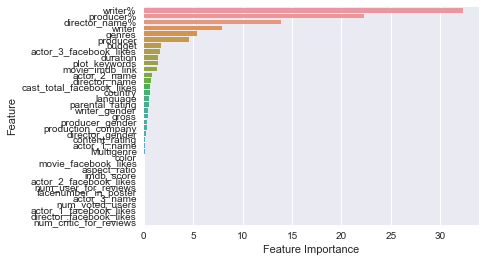

In [28]:
#bar graph importance matrix
barX = [val[0] for val in importanceMatrix]
barY = [val[1] for val in importanceMatrix]

barX.reverse()
barY.reverse()

ax = sns.barplot(x=barY, y=barX, orient="h") 
ax.set_xlabel("Feature Importance")
ax.set_ylabel("Feature")

In [ ]:
#Looks like the percentages we used were the most important features for the trees we used in classification.

In [29]:
from sklearn.metrics import confusion_matrix

theMatrix = confusion_matrix(y_test, preds)
print(theMatrix)

[[ 35 119   2  11]
 [  8 270   3  26]
 [  5 129  12  12]
 [  1  14   1 842]]


In [32]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[ 0.20958084  0.71257485  0.01197605  0.06586826]
 [ 0.02605863  0.87947883  0.00977199  0.08469055]
 [ 0.03164557  0.8164557   0.07594937  0.07594937]
 [ 0.0011655   0.01631702  0.0011655   0.98135198]]


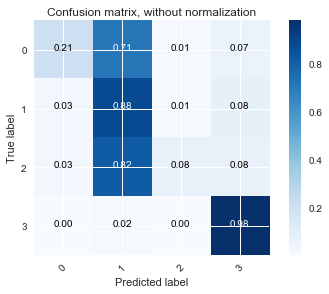

In [34]:
plot_confusion_matrix(theMatrix, classes=['0', '1','2','3'], normalize=True, title='Confusion matrix, without normalization')

In [ ]:
#Really good at detecting 1s and 3s here, with either no talking women or the true label.

In [ ]:
#Binary classification problem: is 100% accuracy due to prevalence of FAILS. Its easy to predict 0s.
#Rating accuracy is much lower. This is a much harder problem to get right.
#Lets look at original bechdel dataset
bechdelClean = pd.read_csv('bechdel_clean.csv')
ids = []
for imdb_id in bechdelClean.imdb_id.values:
    ids.append(imdb_id)
     
reducedDataset = bechdelDataset[bechdelDataset.imdb_id.isin(ids)]
print(reducedDataset)

In [ ]:
train, test = train_test_split(reducedDataset, test_size=test_size)

reducedDataset = reducedDataset.fillna('')
colNames = [col for col in reducedDataset.columns.values if col not in ['Unnamed: 0.1', 'Unnamed: 0', 'id', 'imdb_id', 'Rating', 'test', 'clean_test', 'Unnamed: 0_y', 'binary', 'domgross',	'intgross',	'budget_2013$','domgross_2013$','intgross_2013$','box_office','adjusted_box_office']]
a = 0
for col in colNames:
    a += 1

X_train, y_train = train[colNames], train['Rating']
model = catboost.CatBoostClassifier(iterations=2, learning_rate=1, depth=2, loss_function='Logloss')

cat_features = []
i = 0
for col in colNames:
    if (reducedDataset[col].dtype == 'object' and col != 'imdb_score'):
       cat_features.append(i)
    i += 1

trainPool = Pool(X_train, y_train, cat_features)
model.fit(trainPool)
print(model)

X_test, y_test = test[colNames], test['Rating']
print(y_test.values)
print(len(y_test))
testPool = Pool(X_test, y_test, cat_features)
preds_class  = model.predict(testPool)


In [ ]:
from sklearn.metrics import accuracy_score

print(preds_class)
print(len(preds_class))
accuracy = accuracy_score(y_test, preds_class)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


In [39]:
#Boosting does very well for both types of classifiers. Now lets do revenue analysis for post 1990 
#American films. This will let us see how the Bechdel test affects revenue.
reducedSet = bechdelDataset[bechdelDataset.country == 'USA']
revenueHollywoodDataset = reducedSet[reducedSet.Year > 1989]
revenueHollywoodDataset.columns.values

array(['Unnamed: 0', 'id', 'imdb_id', 'Rating', 'Title', 'Year',
       'Unnamed: 0_y', 'color', 'director_name', 'num_critic_for_reviews',
       'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres',
       'actor_1_name', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes', 'binary', 'test',
       'clean_test', 'domgross', 'intgross', 'budget_2013$',
       'domgross_2013$', 'intgross_2013$', 'producer', 'writer',
       'box_office', 'parental_rating', 'production_company',
       'adjusted_box_office', 'Multigenre', 'director_name%', 'writer%',
       'producer%', 'director_gender', 'producer_gender', 'writer_gender'], dtype=object)

In [40]:
passHollywood = revenueHollywoodDataset[revenueHollywoodDataset.binary == 1]
failHollywood = revenueHollywoodDataset[revenueHollywoodDataset.binary == 0]

319198088.28884685
306666574.88085055


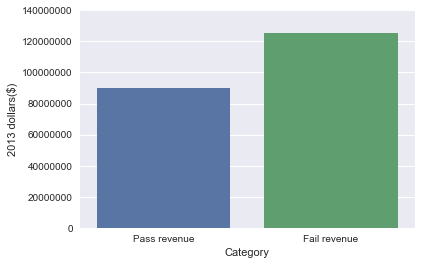

In [56]:
medianPassValue = 0.0
medianPassLen = 0.0
medianFailValue = 0.0
medianFailLen = 0.0
medianPasses = []
medianFails = []

for revenue in passHollywood.adjusted_box_office.values:
    if (int(revenue) != 0):
       medianPasses.append(revenue)

medianPassValue = pd.Series(medianPasses).median()
medianPassStd = pd.Series(medianPasses).std()    
for revenue in failHollywood.adjusted_box_office.values:
    if (int(revenue) != 0):
        medianFails.append(revenue)  
        
medianFailValue = pd.Series(medianFails).median()        
medianFailStd = pd.Series(medianFails).std() 

print(medianPassStd)
print(medianFailStd)
    
ax = sns.barplot(x=["Pass revenue", "Fail revenue"], y=[medianPassValue, medianFailValue], orient="v") 
ax.set_ylim(0, 140000000)
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('2013 dollars($)')
ax.set_xlabel('Category')

In [60]:
#There is a significant difference between medians. Lets look by genre

In [67]:
from collections import defaultdict
genreDict = defaultdict(list)
genres = list(passHollywood['genres'].values)
failGenres = list(failHollywood['genres'].values)

passHollywood = passHollywood.reset_index()
failHollywood.reset_index()
indices = list(passHollywood.index) + list(failHollywood.index)
a = 0
for genre in genres:
    genreDict[genre].append((passHollywood.iloc[indices[a]]['binary'], passHollywood.iloc[indices[a]]['adjusted_box_office']))
    a += 1
    
for genre in failGenres:  
    genreDict[genre].append((failHollywood.iloc[indices[a]]['binary'], failHollywood.iloc[indices[a]]['adjusted_box_office']))
    a += 1
    
genreX = []
genreY = []

failGenreX = []
failGenreY = []

for genre in genreDict:
    genreX.append(genre)
    failGenreX.append(str(genre))
    passBoxOffices = []
    genreLen = 0.0
    failBoxOffices = []
    failGenreLen = 0.0
    
    for value, box_office in genreDict[genre]:
        if (box_office != 0.0 and value == 0):
            failBoxOffices.append(box_office)
            failGenreLen += 1.0
            
        if (box_office != 0.0 and value == 1):
            passBoxOffices.append(box_office)
            genreLen += 1.0
                          
    genreY.append(pd.Series(passBoxOffices).median())
    failGenreY.append(pd.Series(failBoxOffices).median())


In [72]:
#scenarios
genres = []
scenarios = []
revenues = []
for i in range(len(genreX)):
   genres.append(genreX[i])
   genres.append(failGenreX[i])
   scenarios.append("pass")
   scenarios.append("fail")
   if (pd.isnull(genreY[i])):
      genreY[i] = 0.0
   revenues.append(genreY[i]) 
   if (pd.isnull(failGenreY[i])):
      failGenreY[i] = 0.0  
   revenues.append(failGenreY[i])
      

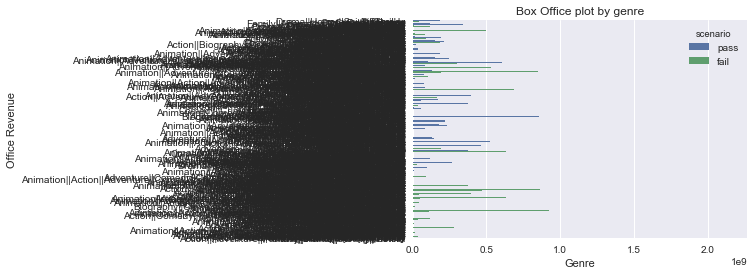

In [73]:
theData = pd.DataFrame({"genre": genres, "scenario": scenarios, "revenue": revenues}) 
    
ax = sns.barplot(x="revenue", y="genre", hue='scenario', data=theData, orient='h')
ax.set_ylabel("Office Revenue")
ax.set_xlabel("Genre")
ax.set_title("Box Office plot by genre")

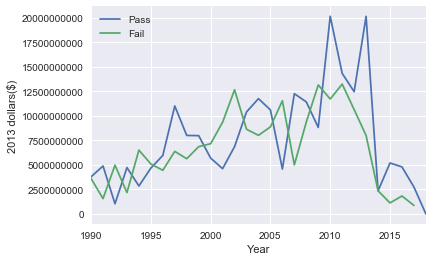

In [89]:
ax = passHollywood.groupby(['Year'])['adjusted_box_office'].sum().plot()
failHollywood.groupby(['Year'])['adjusted_box_office'].sum().plot()
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('2013 dollars($)')
ax.legend(['Pass', 'Fail'])

In [ ]:
#Hmm the dips in the data seem interesting. Otherwise the trend is that both 
#films that pass and fail seem to alternate.

In [ ]:
#Plot 4: median vs mean box office revenue

In [ ]:
#Analysis of genre trends for ones where it matters

In [ ]:
#International and domestic splits

In [ ]:
#How it relates to the budget

In [ ]:
#Hypothesis test thrown in as well